In [332]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [333]:
# Lista de dicionários para armazenar as métricas
metricas = []

for pSize in range(1, 51):
    
    name_image = 'Kodak01'
    valor_psnr = random.uniform(0, 50)  # Substitua obter_valor_psnr(pSize) pelo código para obter o valor do PSNR para pSize
    valor_ssim = random.uniform(0, 40)  # Substitua obter_valor_ssim(pSize) pelo código para obter o valor do SSIM para pSize
    valor_vif = random.uniform(0, 100)    # Substitua obter_valor_vif(pSize) pelo código para obter o valor do VIF para pSize

    metrica = {'pSize': pSize, 'psnr': valor_psnr, 'ssim': valor_ssim, 'vif': valor_vif}
    metricas.append(metrica)
        
    # Gravar os dados no arquivo de texto
    with open(f'./metricas_txts/metricas_fake_{name_image}.txt', 'w') as arquivo:
        for metrica in metricas:
            linha = f"pSize: {metrica['pSize']}, PSNR: {metrica['psnr']}, SSIM: {metrica['ssim']}, VIF: {metrica['vif']}\n"
            arquivo.write(linha)


In [334]:
# Pegar dataset de um arquivo txt
df = pd.read_csv('./metricas_txts/metricas_kodim01.png.txt', sep=',', header=None, names=['pSize', 'psnr', 'ssim', 'vif'])

In [335]:
# retirar as labels de cada coluna
df = df.applymap(lambda x: x.split(': ')[1])
# Arredondar os valores para 6 casas decimais
df = df.applymap(lambda x: round(float(x), 6))

In [336]:
df.head(10)

,pSize,psnr,ssim,vif
0,5.0,48.042078,0.998121,0.951029
1,10.0,41.929556,0.994733,0.887866
2,20.0,41.949459,0.993541,0.872691
3,30.0,44.451414,0.996806,0.919016
4,50.0,38.152533,0.990632,0.817316


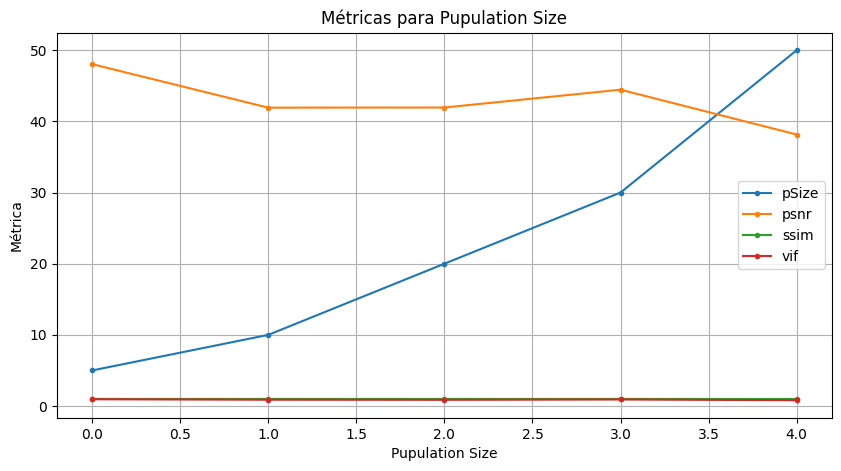

In [337]:
# plotar o gráfico
df.plot(figsize=(10, 5), grid=True, style='.-')
plt.xlabel('Pupulation Size')
plt.ylabel('Métrica')
plt.title('Métricas para Pupulation Size')
plt.show()

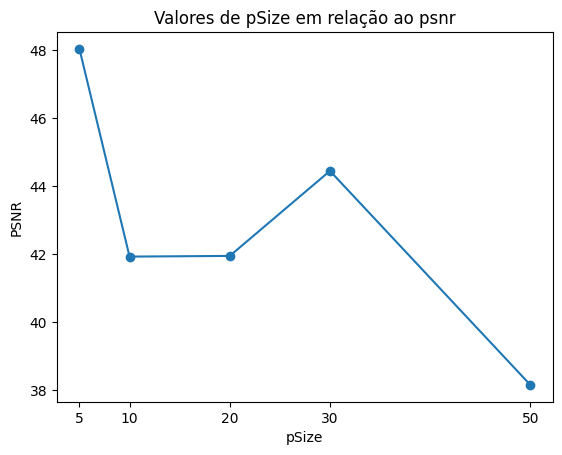

In [338]:
# plotar o gráfico somente do PSNR

plt.plot(df['pSize'], df['psnr'], 'o-')
plt.xlabel('pSize')
plt.ylabel('PSNR')
plt.title('Valores de pSize em relação ao psnr')
plt.xticks([5, 10, 20, 30, 50])  # Definir os valores do eixo x
plt.show()

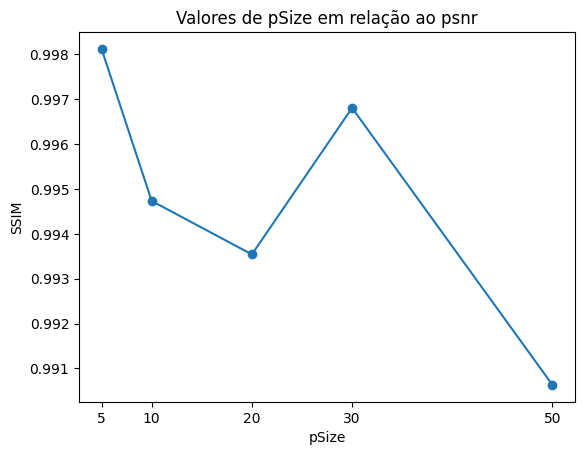

In [339]:
# plotar grafico somente do SSIM

plt.plot(df['pSize'], df['ssim'], 'o-')
plt.xlabel('pSize')
plt.ylabel('SSIM')
plt.title('Valores de pSize em relação ao psnr')
plt.xticks([5, 10, 20, 30, 50])  # Definir os valores do eixo x
plt.show()

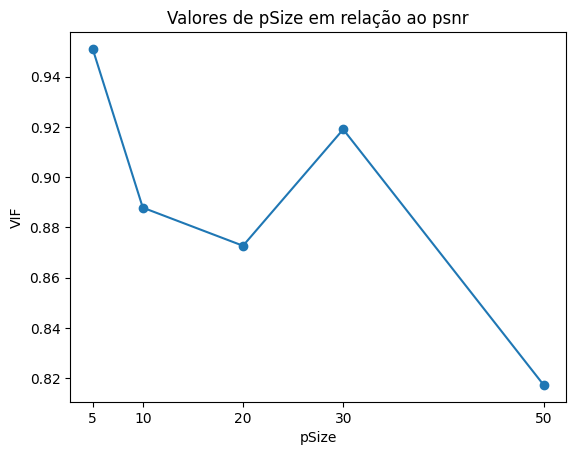

In [340]:
# plotar grafico somente do VIF

plt.plot(df['pSize'], df['vif'], 'o-')
plt.xlabel('pSize')
plt.ylabel('VIF')
plt.title('Valores de pSize em relação ao psnr')
plt.xticks([5, 10, 20, 30, 50])  # Definir os valores do eixo x

plt.show()